In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rc,rcParams
rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
rcParams['font.family'] = "sans-serif"

direc = 'C:/Users/Bas/Google Drive/Bas Games/'
fig_direc = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/'

In [2]:
def compute_rt_correlation(tobs,n,player,tpred):
    tpred_norm=np.empty(tobs.shape[0]) * np.nan
    for i in range(40):
        ind=np.logical_and.reduce([player==i,n>5,n<30])
        if(any(ind)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(tpred[ind]+0.5),np.log(tobs[ind]))
            tpred_norm[ind]=np.exp(np.log(tpred[ind]+0.5)*slope+intercept)
    ind=np.logical_and(n>5,n<30)
    return np.corrcoef(np.log(tpred_norm[ind]),np.log(tobs[ind]))[0,1]

def compute_rt_correlation_sub(tobs,n,f,tpred):
    ind=np.logical_and.reduce([f,n>5,n<30])
    return np.corrcoef(np.log(tpred[ind]+0.5),np.log(tobs[ind]))[0,1]

def plot_with_baseline(fig,ax,s,y,ylabel,err=[]):
    ax.set_xscale('log')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Stopping threshold')
    if len(err) == 0:
        ax.plot(s[:-1],y[:-1],'.-')
    else:
        ax.errorbar(s[:-1],y[:-1],yerr = err[:-1])
    ax.axhline(y[-1],color = 'black')
    ax.axvline(50,color = 'black',linestyle='dashed')


C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


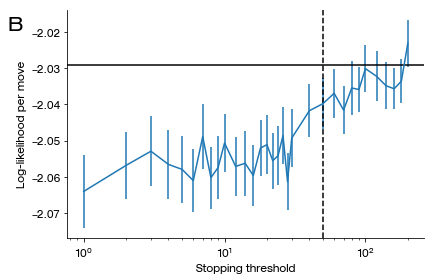

In [9]:
L = np.loadtxt(direc + 'loglik_stopping_rule.txt')
s = L[0].astype('int')
L = L[1:]
m = np.mean(L,axis=0)
e = np.std(L-L[:,-1][:,None],axis=0)/np.sqrt(L.shape[0])
fig,ax = plt.subplots()
plot_with_baseline(fig,ax,s,-m,'Log-likelihood per move',err = e)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.9, 'B', horizontalalignment='center',
    verticalalignment='center', transform=fig.transFigure, fontsize = 20)

fig.tight_layout()
fig.savefig(fig_direc + 'stopping_threshold_B.pdf')
plt.show()

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


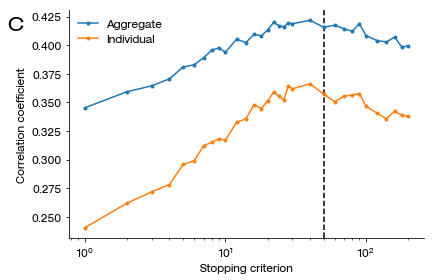

In [10]:
t=np.loadtxt(direc + 'Analysis/Time/time_hvh_final.txt')
T=np.loadtxt(direc + 'time_stopping_rule.txt')
s = T[0].astype('int')
T = T[1:]
n = t[:T.shape[0],1].astype(int)
tobs = t[:T.shape[0],2]
player = t[:T.shape[0],0].astype(int)

for i in range(40):
    tobs[player==i]/=np.mean(tobs[player==i])

fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_ylabel('Correlation coefficient')
ax.set_xlabel('Stopping criterion')
ax.axvline(50,color = 'black',linestyle='dashed')

plt.plot(s[:-1],[compute_rt_correlation(tobs,n,player,T[:,i]) for i in range(T.shape[1]-1)],'.-',
         label='Aggregate')

plt.plot(s[:-1],[np.nanmean([compute_rt_correlation_sub(tobs,n,player==i,T[:,j]) for i in range(40)]) 
            for j in range(T.shape[1]-1)],'.-',label='Individual')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.9, 'C', horizontalalignment='center',
    verticalalignment='center', transform=fig.transFigure, fontsize = 20)

fig.tight_layout()
fig.savefig(fig_direc + 'stopping_threshold_C.pdf')
plt.show()

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


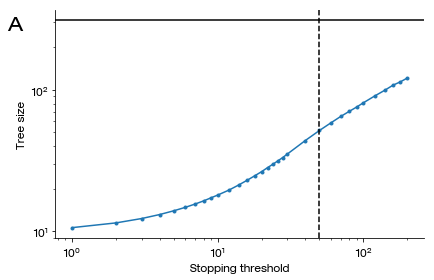

In [11]:
fig,ax = plt.subplots()
plot_with_baseline(fig,ax,s,np.mean(T[np.logical_and(n>5,n<30)],axis=0),'Tree size')
ax.set_yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.9, 'A', horizontalalignment='center',
    verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'stopping_threshold_A.pdf')
plt.show()